In [61]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import seaborn as sns
from scipy import signal

def MagModel(n_channel, coordinates, roll=-14):
    ant_angles = np.arange(0, 360, 360//n_channel)

    x_array = 0.1 * np.cos(np.radians(ant_angles))
    y_array = 0.1 * np.sin(np.radians(ant_angles))
    x_coord, y_coord = coordinates[:, 0], coordinates[:, 1]
    
    d0 = 0.1
    wavelength = 0.0116

    d = np.sqrt(
        (x_array[:, np.newaxis] - x_coord[np.newaxis, :]) ** 2
        + (y_array[:, np.newaxis] - y_coord[np.newaxis, :]) ** 2
        )
    
    relative_mag = wavelength/d
    
    return relative_mag ** 1



In [7]:
file_repo = Path.home()/'iCloud'/'penn_state_synca_data'/'dig'/'synca1_5slot_scan'
file_name = '221230_synca1_5slot_scan_fft.npy'

In [8]:
data = np.load(file_repo/file_name)
#data = data[:, :, 0:119, :]
#data[:, :, 62:, :] = np.flip(data[:, :, 62:, :], axis=2)
data = np.roll(data, 60, axis=2)


In [104]:
print(data.shape)

(14, 10, 120, 2)


# visualize magnitudes

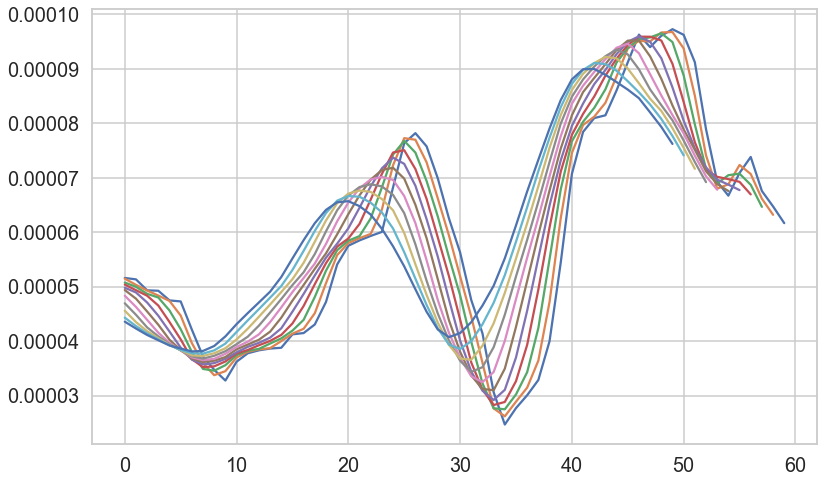

In [105]:
radii = np.arange(-10, 40,5)*0.001

sns.set_theme(context='talk', style='whitegrid', font_scale=1.2)
clist = sns.color_palette('deep', n_colors=12)
fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(1,1,1)

for j,m in enumerate([3]):

    for i,n in enumerate([2]):
        for k in [1,2,3,4,5,6,7,8,9,10,11]:
            mags = abs(data[m,n,:,1])
            mags = mags[np.arange(0,120,2)] # resample
            ax.plot(np.convolve(mags, np.ones(k)/k, mode='valid'), )


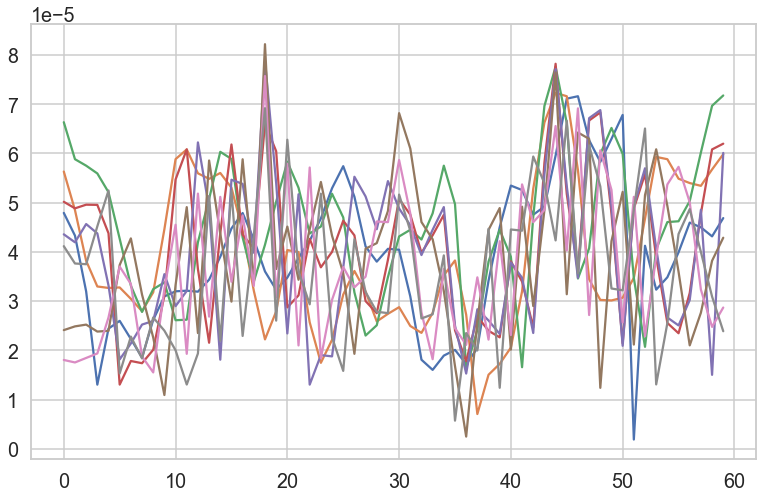

In [83]:
radii = np.arange(-10, 40,5)*0.001

sns.set_theme(context='talk', style='whitegrid', font_scale=1.2)
clist = sns.color_palette('deep', n_colors=12)
fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(1,1,1)

for j,m in enumerate([0]):

    for i,n in enumerate(np.arange(2,10,1)):
        mags = abs(data[m,n,:,1])
        #mags = mags - np.mean(mags) # rescale
        #mags = mags - np.mean(mags) # remove DC
        mags = mags[np.arange(0,120,2)] # resample
        x = np.array([radii[n]])
        y = np.array([0.0])
        coord = np.array([x,y]).T
        model_mags = np.roll(MagModel(120,coord)[np.arange(0,120,2),0],30)*np.mean(mags)

        ax.plot(np.convolve(mags, np.ones(1)/1, mode='valid'), color=clist[i], )
        #if j == 0:
        #    axs[i].plot(model_mags, color='k')
        #axs[i].set_ylim(0,1.5e-4)

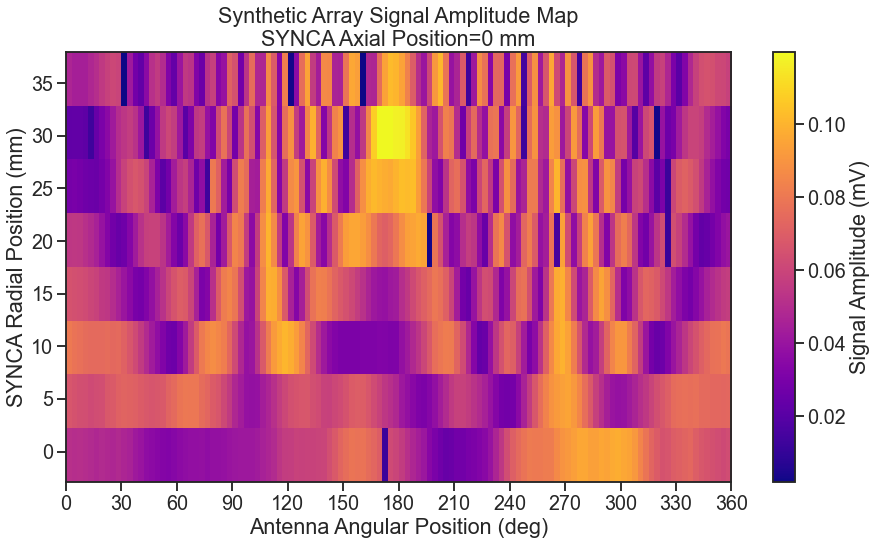

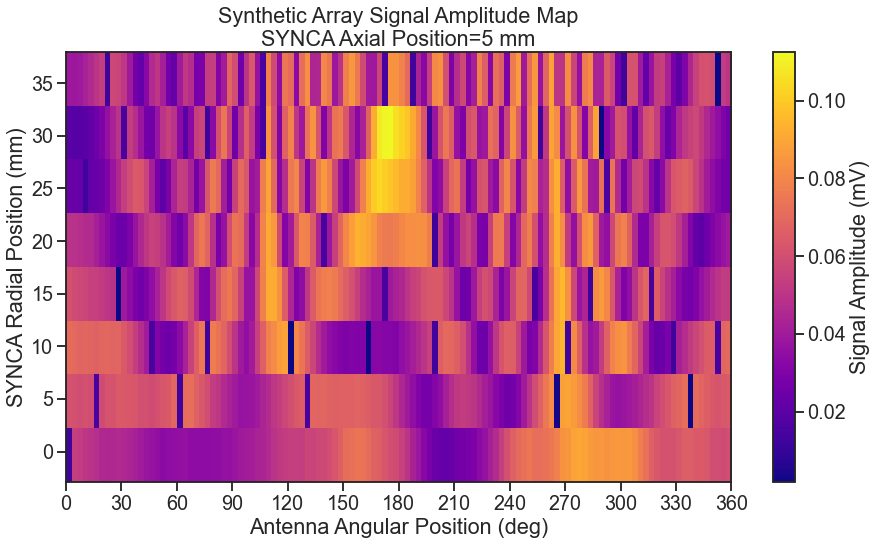

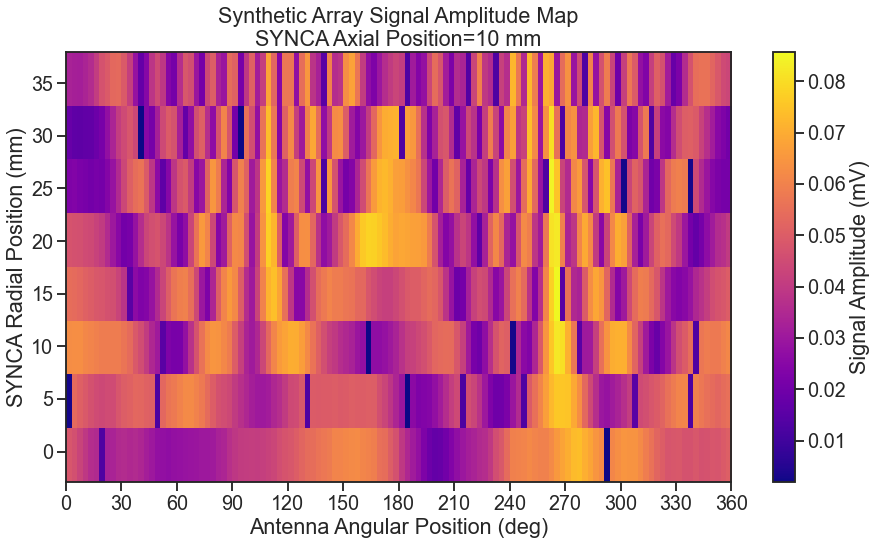

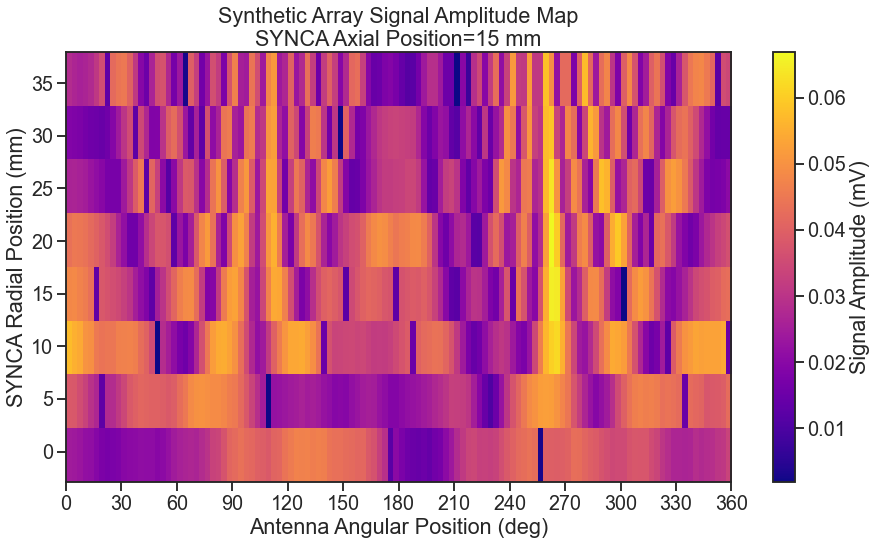

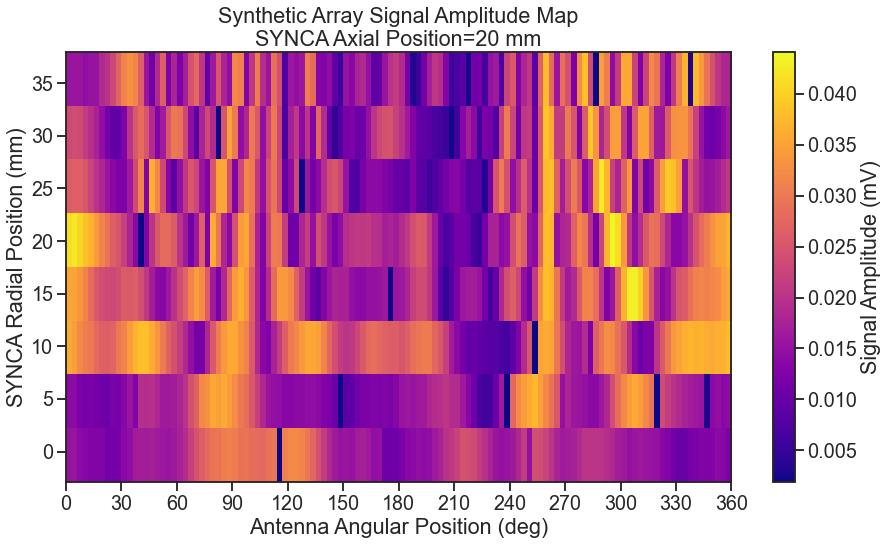

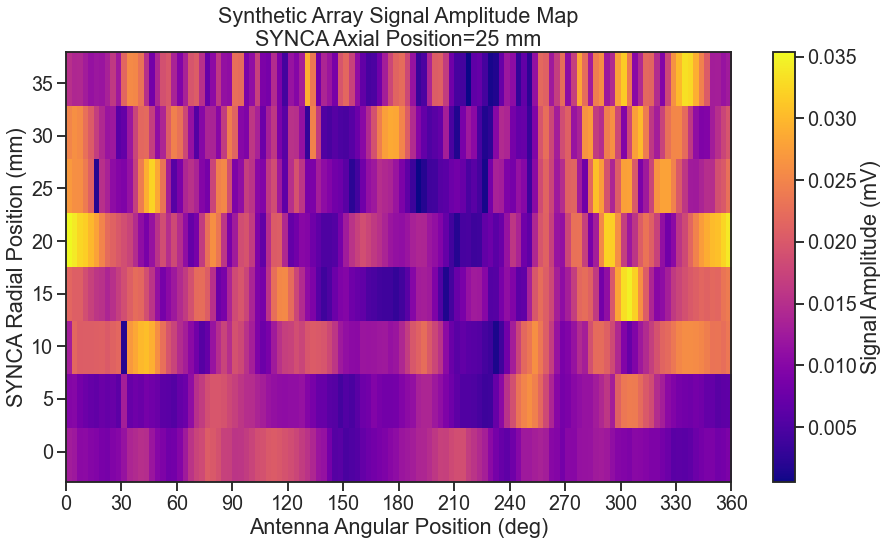

In [140]:
radii = np.arange(-10, 40,5)*0.001
axii = np.arange(0,30,5)

sns.set_theme(context='talk', style='ticks', font_scale=1.2)
clist = sns.color_palette('deep', n_colors=12)
cmap = sns.color_palette('plasma',as_cmap=True)

for j,m in enumerate([3,4,5,6,7,8,]):
    fig = plt.figure(figsize=(13,8))
    ax = fig.add_subplot(1,1,1)

    mags = abs(data[m,2:,:,1])
    #mags = mags - np.mean(mags) # rescale
    #mags = mags - np.mean(mags) # remove DC

    for k in range(mags.shape[0]):
        mags[k,:] = np.convolve(mags[k,:], np.ones(1)/1, mode='same')
    mags = mags[:, np.arange(0,120,1)] # resample

    img = ax.imshow(
        np.flip(mags*1e3, axis=0),
        aspect='auto',
        cmap=cmap,
        extent=(0,360,0,35)
    )
    ax.set_yticks(np.linspace(2.5,32.5,8))
    ax.set_yticklabels(np.arange(0,40,5))
    ax.set_xticks(np.linspace(0, 360, 13))
    cbar = fig.colorbar(img, label='Signal Amplitude (mV)')
    ax.set_ylabel('SYNCA Radial Position (mm)')
    ax.set_xlabel('Antenna Angular Position (deg)')
    ax.set_title('Synthetic Array Signal Amplitude Map'+'\n'+f'SYNCA Axial Position={axii[j]} mm')
    plt.tight_layout(pad=1.05)
    name = f'230120_synth_array_signal_amplitude_map_z{axii[j]}'
    plt.savefig(Path.home()/'iCloud'/'plots'/name, dpi=72)
    #if j == 0:
    #    axs[i].plot(model_mags, color='k')
    #axs[i].set_ylim(0,1.5e-4)

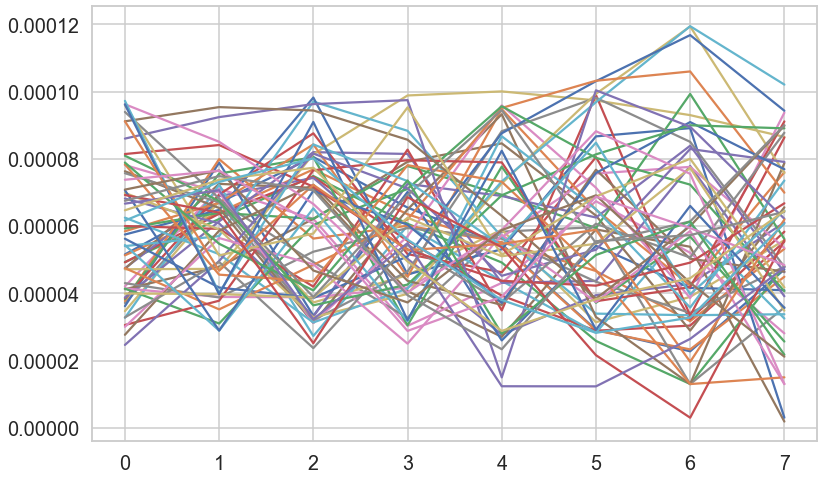

In [108]:
radii = np.arange(-10, 40,5)*0.001

sns.set_theme(context='talk', style='whitegrid', font_scale=1.2)
clist = sns.color_palette('deep', n_colors=12)
fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(1,1,1)

for j,m in enumerate([3]):

    mags = abs(data[m,2:,:,1])
    for k in np.arange(0, 120,2):
        ax.plot(mags[:, k])


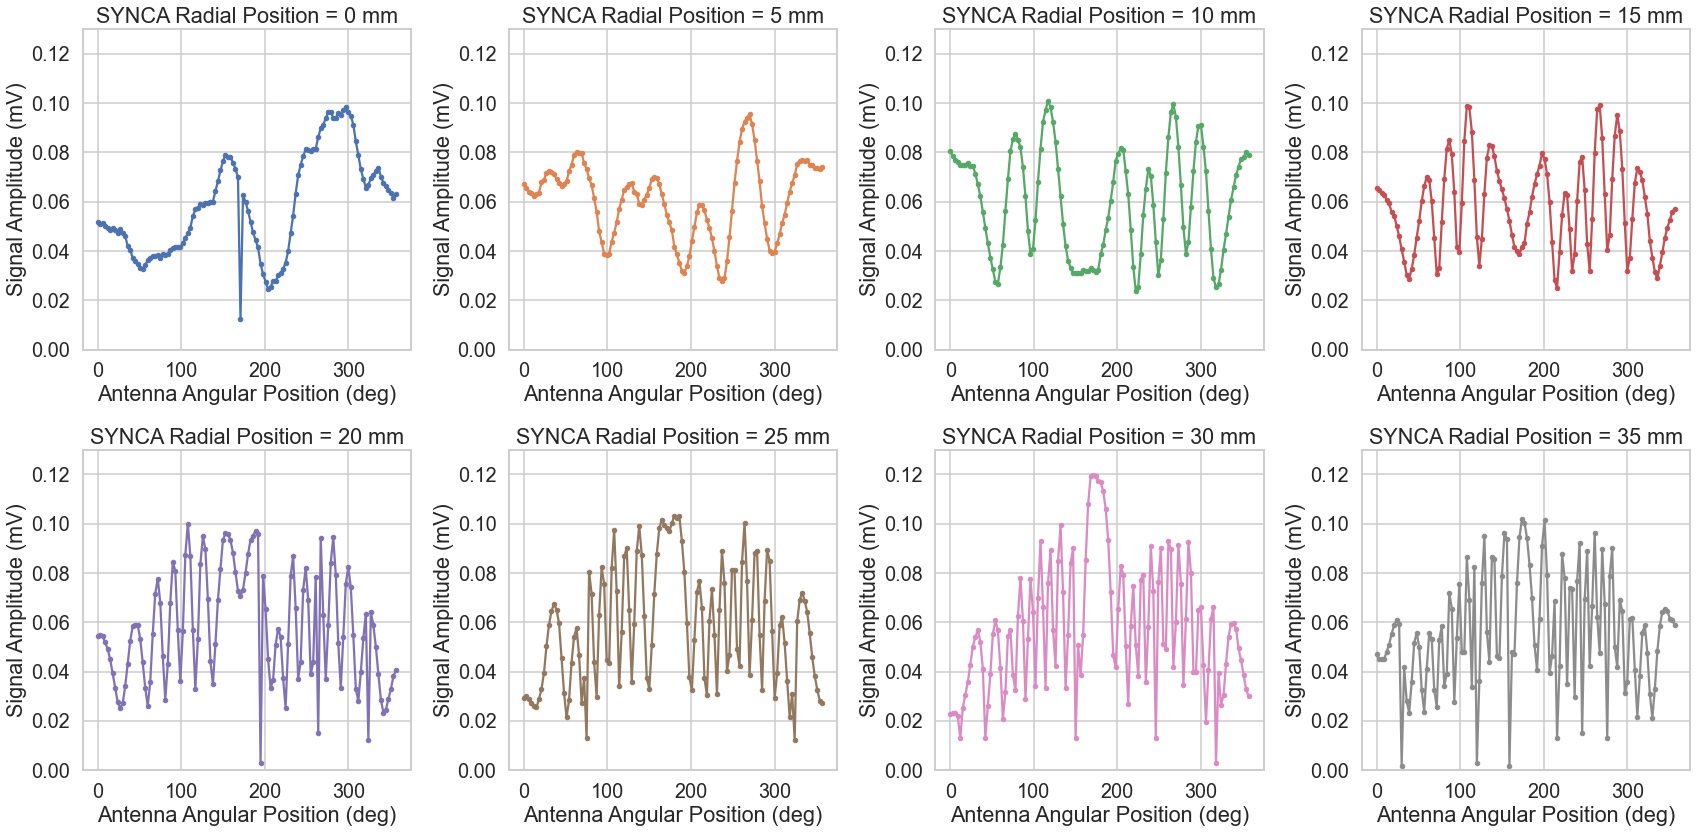

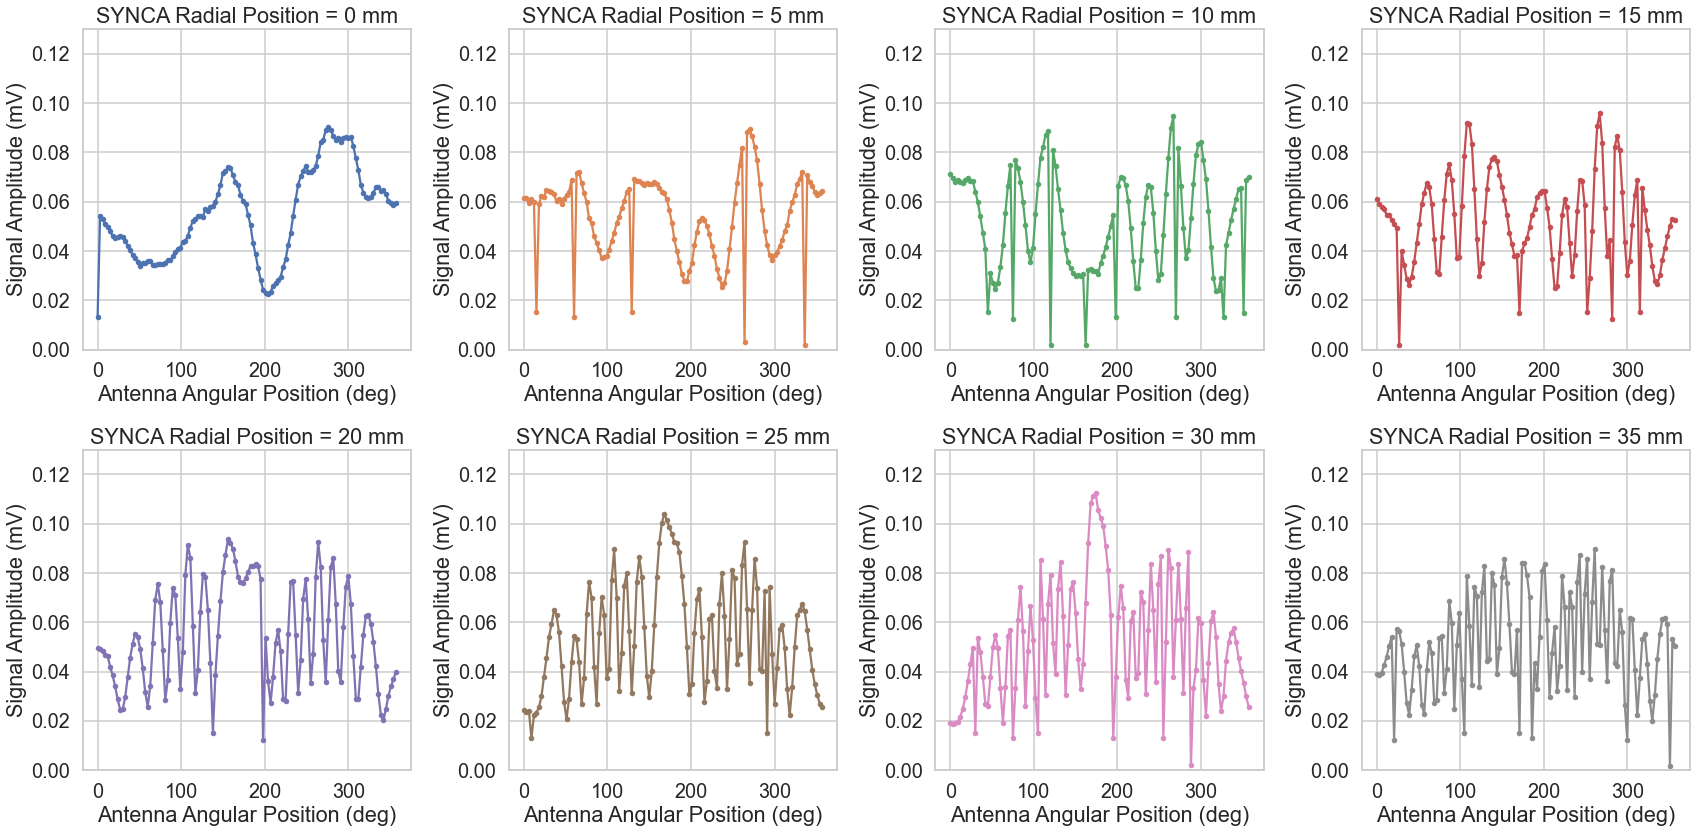

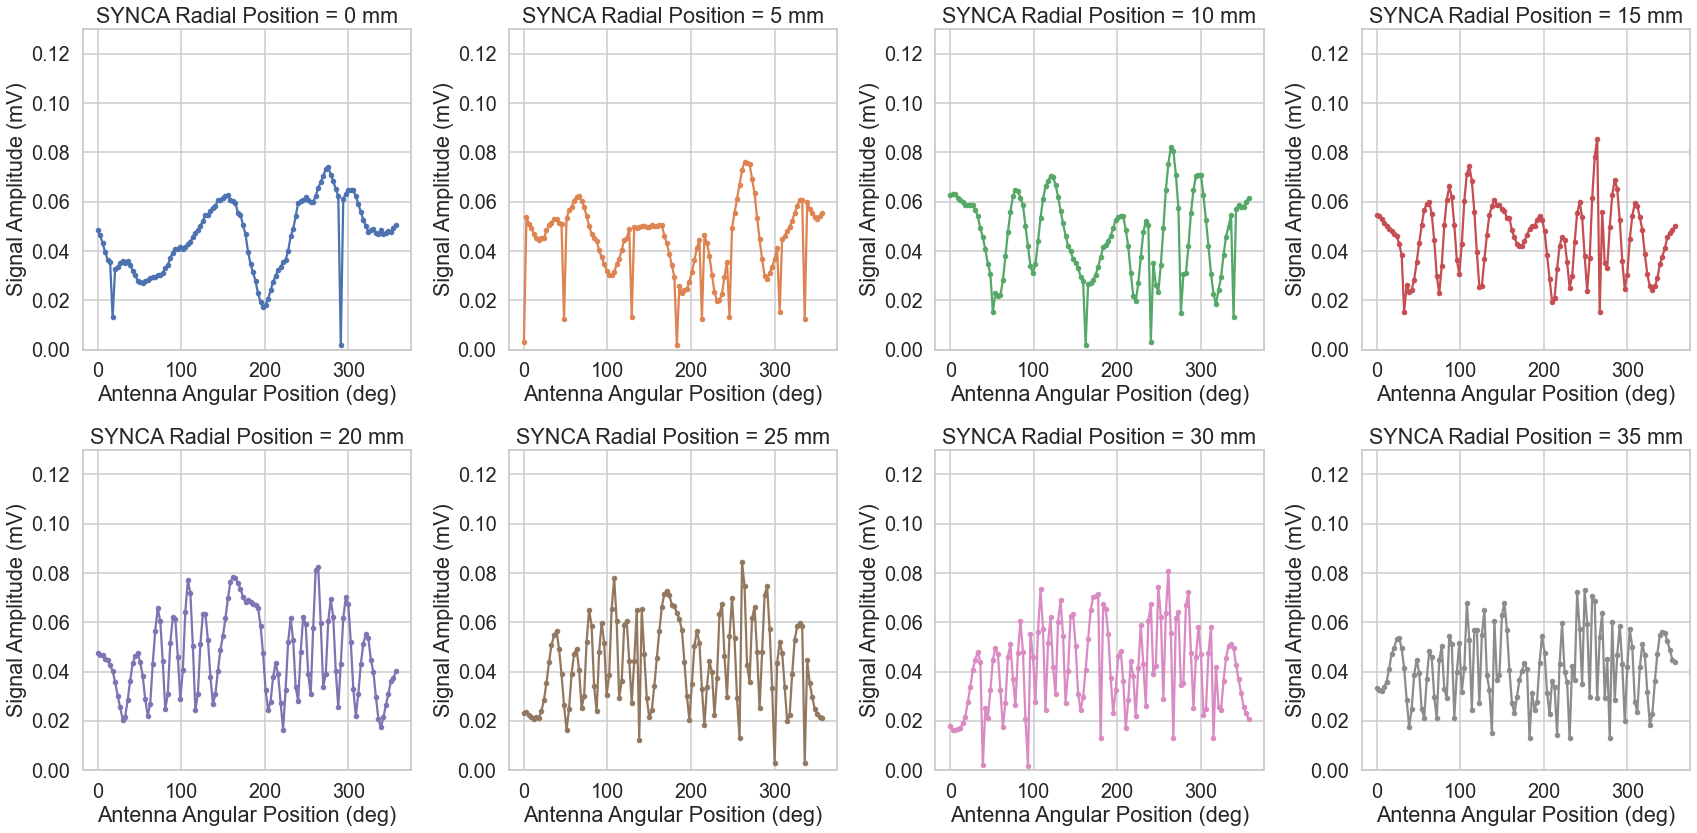

In [161]:
radii = np.arange(-10, 40,5)*0.001
axii = np.arange(-15,50,5)

sns.set_theme(context='talk', style='whitegrid', font_scale=1.2)
clist = sns.color_palette('deep', n_colors=12)
#fig = plt.figure(figsize=(13,8))
#ax = fig.add_subplot(1,1,1)



for j,m in enumerate([3,4,5]):
    
    fig,axs = plt.subplots(2,4,figsize=(24,12))
    axs = axs.flatten()

    for i,n in enumerate(np.arange(2,10,1)):
        mags = abs(data[m,n,:,1])
        #mags = mags - np.mean(mags) # rescale
        #mags = mags - np.mean(mags) # remove DC
        mags = mags[np.arange(0,120,1)] # resample
        x = np.array([radii[n]])
        y = np.array([0.0])
        coord = np.array([x,y]).T
        model_mags = np.roll(MagModel(120,coord)[np.arange(0,120,2),0],30)
        model_mags -= model_mags.mean()

        axs[i].plot(np.arange(0,360,3), mags*1e3, color=clist[i],ls='-',marker='.', )
        axs[i].set_xlabel('Antenna Angular Position (deg)')
        axs[i].set_ylabel('Signal Amplitude (mV)')
        axs[i].set_title(f'SYNCA Radial Position = {int(1000*radii[n])} mm')
        #axs[i].plot(mags, color=clist[i], )
        #if j == 0:
        #    axs[i].plot(model_mags, color='k')
        axs[i].set_ylim(0,0.13)
        
        
    plt.tight_layout(pad=1.05)
    name = f'230120_synthetic_array_mag_curves_z{axii[m]}'
    plt.savefig(Path.home()/'iCloud'/'plots'/name, dpi=144)

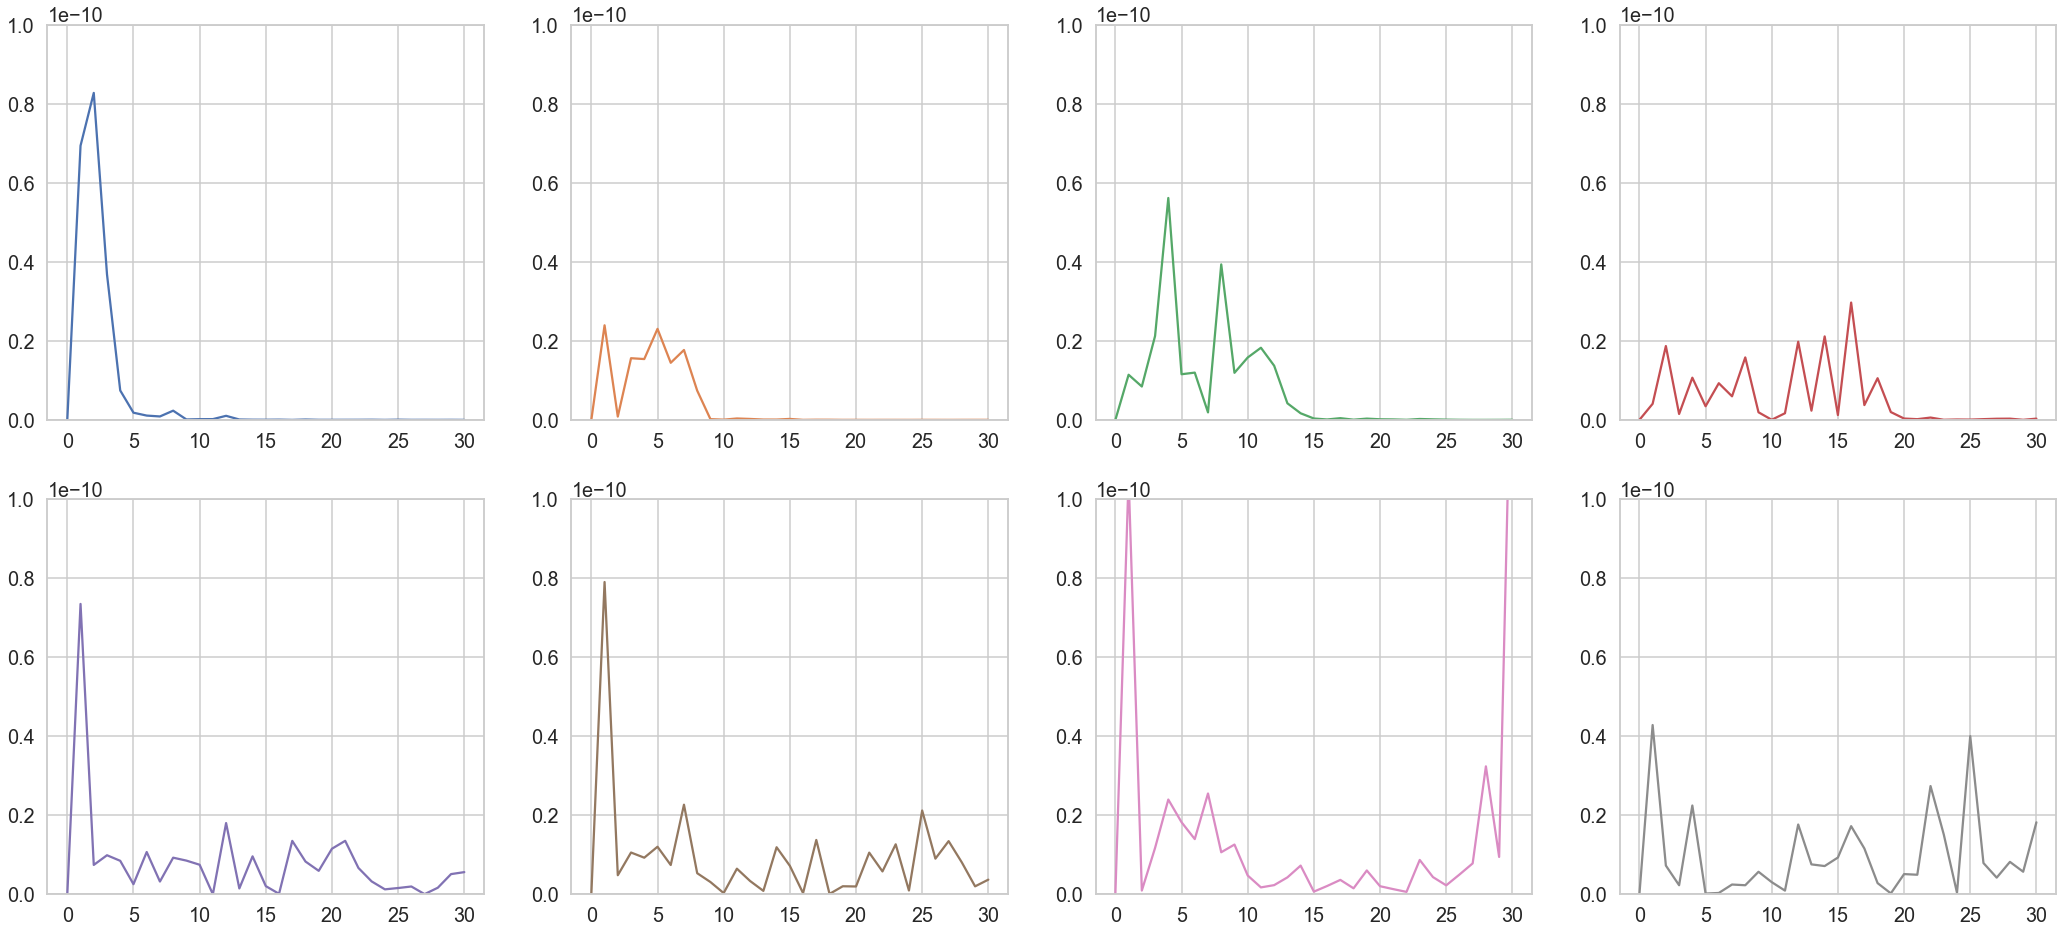

In [24]:
radii = np.arange(-10, 40,5)*0.001

sns.set_theme(context='talk', style='whitegrid', font_scale=1.2)
clist = sns.color_palette('deep', n_colors=12)
fig, axs = plt.subplots(2,4,sharex=False,sharey=False,figsize=(36,16))
axs=axs.flatten()

for j,m in enumerate([3]):

    for i,n in enumerate(np.arange(2,10,1)):
        mags = abs(data[m,n,:,1])
        #mags = mags - np.mean(mags) # rescale
        #mags = mags - np.mean(mags) # remove DC
        mags = mags[np.arange(0,120,2)] # resample

        axs[i].plot(abs(np.fft.rfft(mags-np.mean(mags),norm='forward'))**2, color=clist[i], )
        axs[i].set_ylim(0,1e-10)

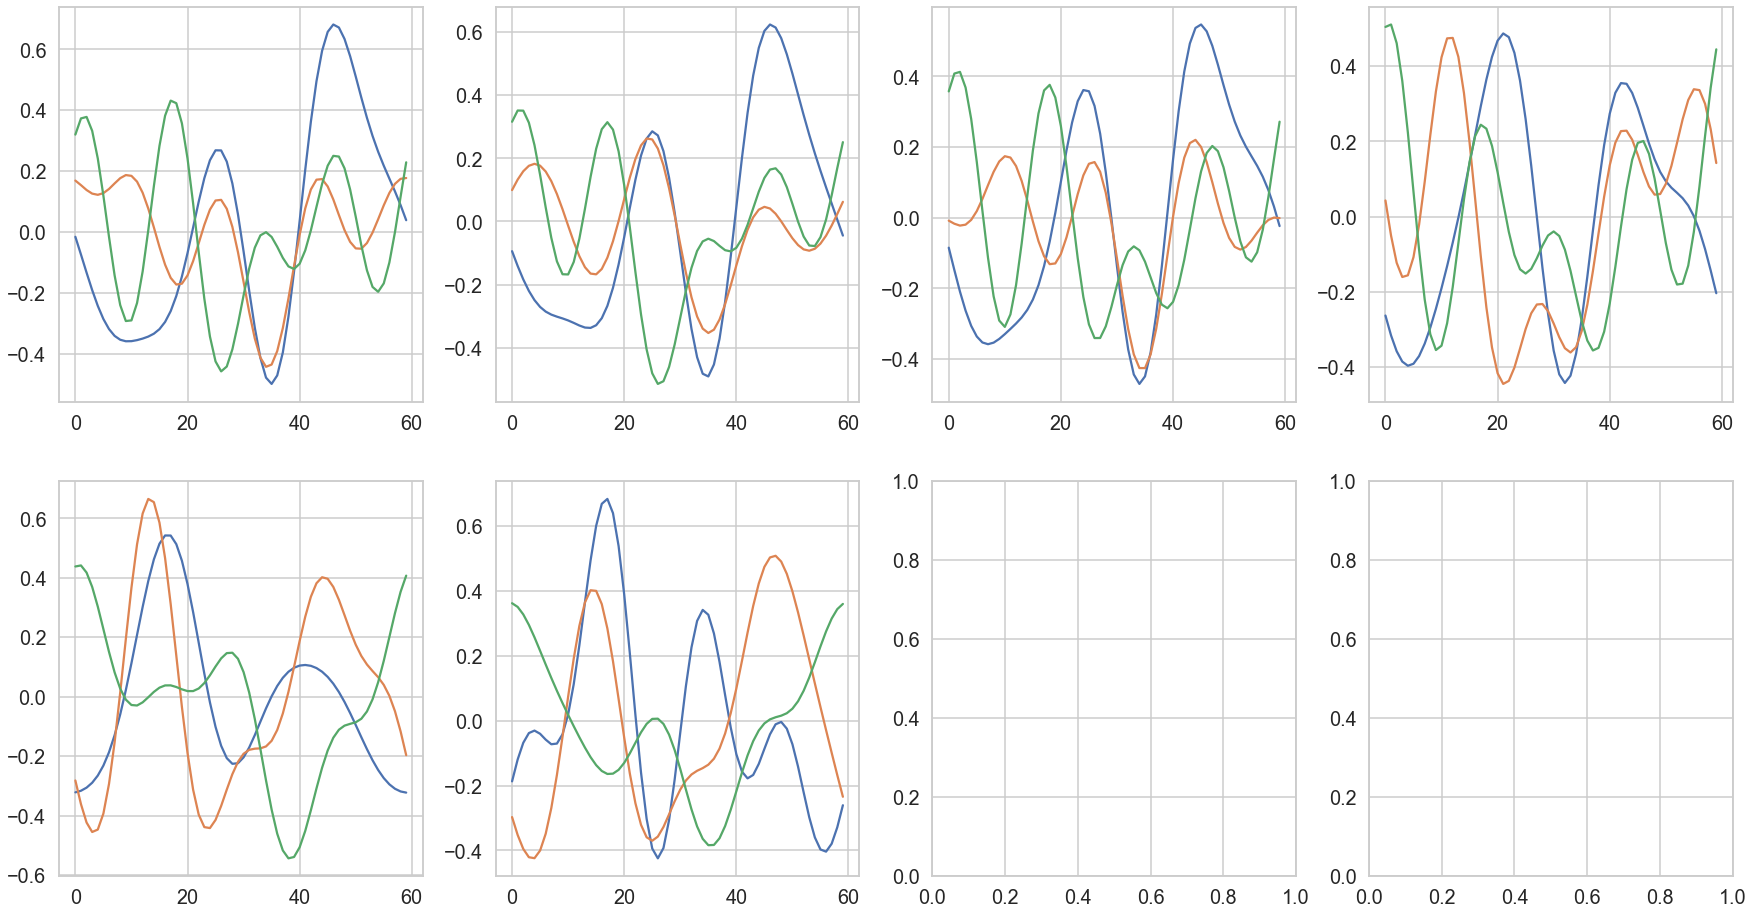

In [80]:
radii = np.arange(-10, 40,5)*0.001

sns.set_theme(context='talk', style='whitegrid', font_scale=1.2)
clist = sns.color_palette('deep', n_colors=12)
fig, axs = plt.subplots(2,4,sharex=False,sharey=False,figsize=(30,16))
axs=axs.flatten()

for j,m in enumerate([3,4,5,6,7,8]):

    for i,n in enumerate(np.arange(2,5,1)):
        mags = abs(corrected_data[m,n,:,1])
        mags = mags / np.mean(mags) # rescale
        mags = mags - np.mean(mags) # remove DC
        mags = mags[np.arange(0,120,2)] # resample
        
        mags = np.fft.rfft(mags)
        mags[5:]=0
        mags = np.fft.irfft(mags)
        
        x = np.array([radii[n]])
        y = np.array([0.0])
        coord = np.array([x,y]).T
        model_mags = np.roll(MagModel(120,coord)[np.arange(0,120,2),0],60)*np.mean(mags)

        axs[j].plot(mags, color=clist[i], )
        #axs[i].set_ylim(0,0.2)

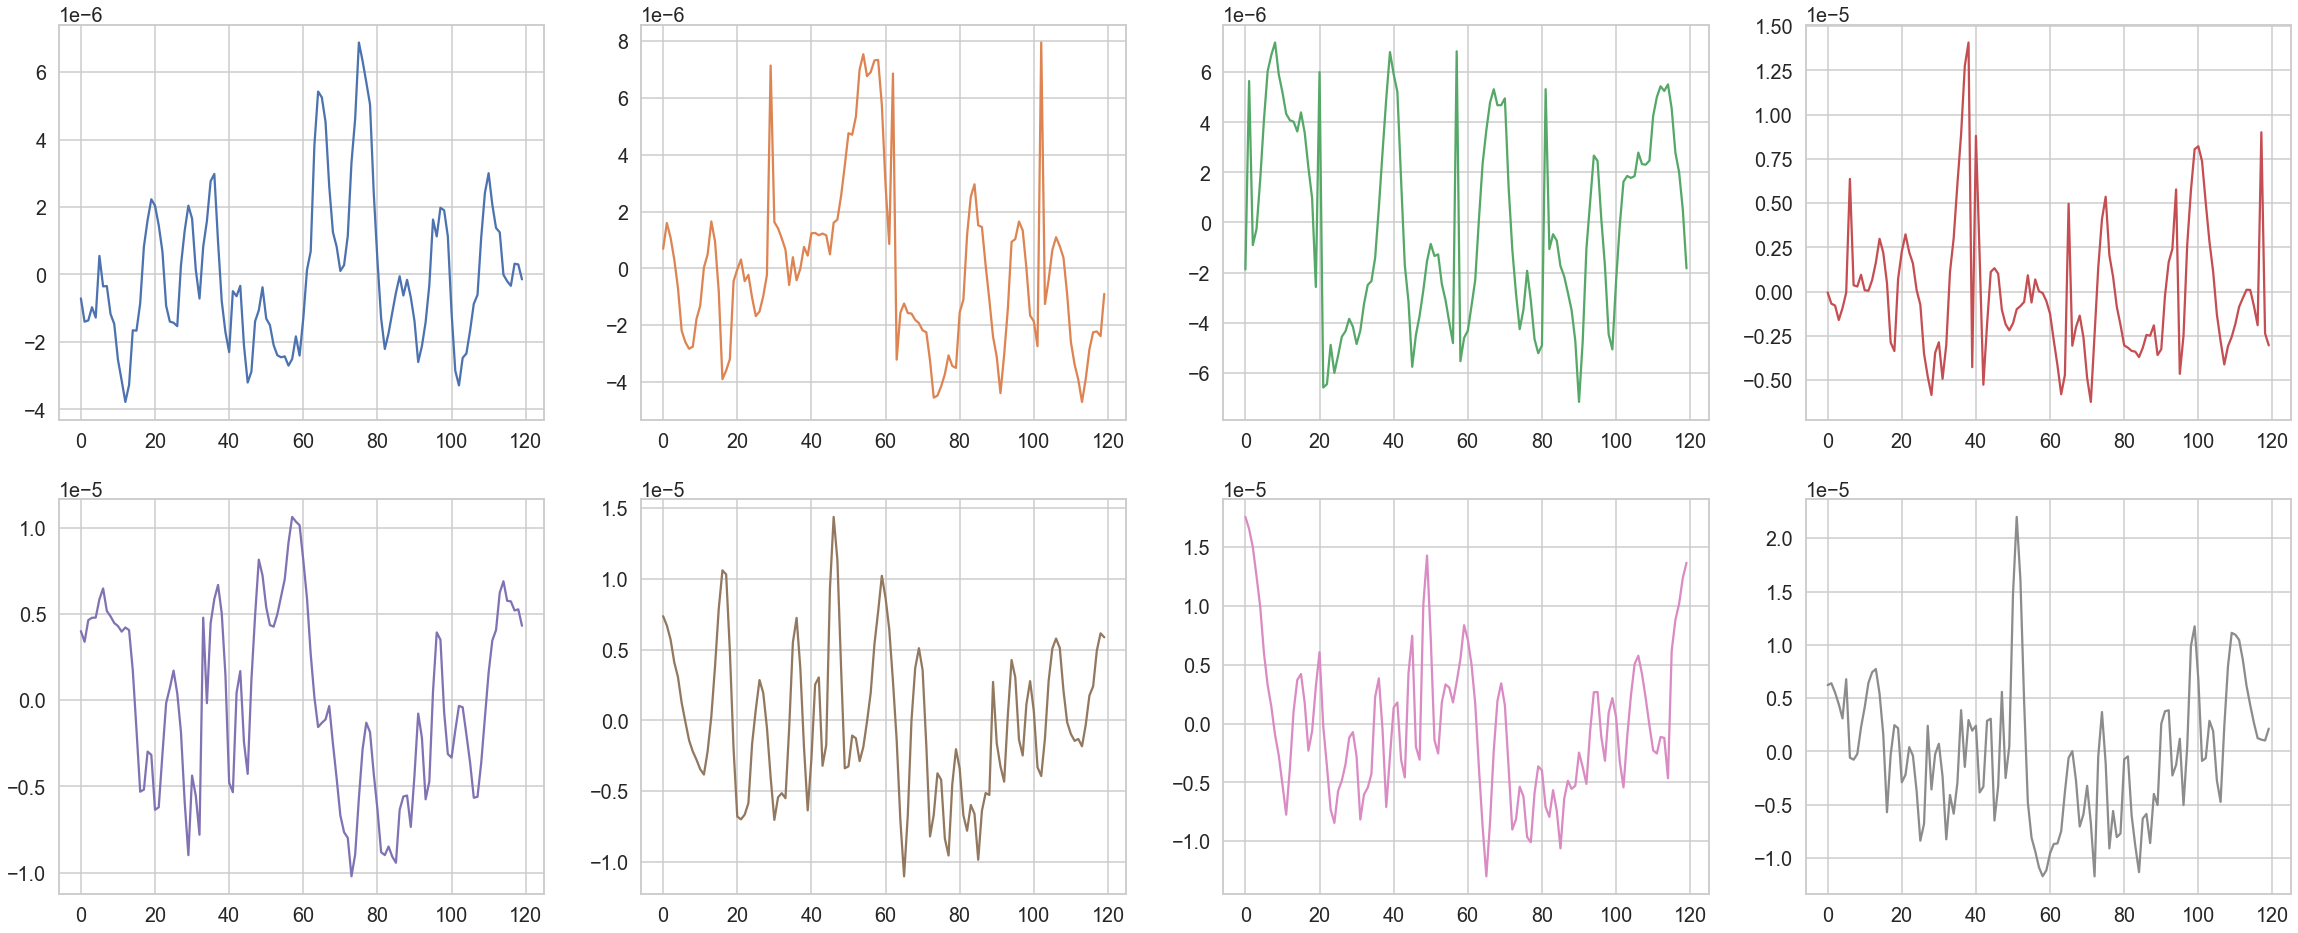

In [54]:
test_ind = 9
sns.set_theme(context='talk', style='whitegrid', font_scale=1.2)

clist = sns.color_palette('deep', n_colors=12)
fig, axs = plt.subplots(2,4,sharex=False,sharey=False,figsize=(40,16))
axs=axs.flatten()
radii = np.arange(-10, 40,5)*0.001
for i,n in enumerate(np.arange(2,10,1)):
    mags = abs(corrected_data[test_ind,n,:,1])
    x = np.array([radii[n]])
    y = np.array([0.0])
    coord = np.array([x,y]).T
    model_mags = np.roll(MagModel(120,coord)[:,0],60)*np.mean(mags)

    axs[i].plot(mags-model_mags, color=clist[i], )
    #axs[i].plot(model_mags,color='k',ls=':')